In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [17]:
# Load the data (replace this with your actual data file)
data = pd.read_csv('data.csv')

# Define features and target
X_features = ['bedrooms', 'bathrooms', 'sqftLiving', 'sqftLot', 'floors', 'waterfront', 'view', 'condition', 'sqftAbove', 'sqftBasement', 'yrBuilt', 'yrRenovated']
target_column = 'price'

# Extract features and target
X_train = data[X_features].values
y_train = data[target_column].values

# Scale/normalize the training data
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)

In [18]:
# Create and fit the regression model
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)


SGDRegressor()

In [20]:
# View parameters
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters: w: {w_norm}, b: {b_norm}")

model parameters: w: [-54544.29836266  49729.4700226  123429.59082479 -23044.09442957
  20363.22805778  16815.80325811  37274.64686842  23913.7344522
 105609.93467902  59970.68209463 -67613.81837821   9997.77006042], b: [553990.59405105]


In [21]:
# Make predictions
y_pred_sgd = sgdr.predict(X_norm)
y_pred = np.dot(X_norm, w_norm) + b_norm
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

prediction using np.dot() and sgdr.predict match: True


In [23]:
# Calculate R-squared
r2 = r2_score(y_train, y_pred_sgd)
print(f"R-squared: {r2}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_train, y_pred_sgd)
print(f"Mean Squared Error (MSE): {mse}")

# Print the range of the target variable
target_range = np.ptp(y_train)
print(f"Range of the target variable '{target_column}': {target_range}")

R-squared: 0.21651764258006745
Mean Squared Error (MSE): 249022393683.0544
Range of the target variable 'price': 26590000.0


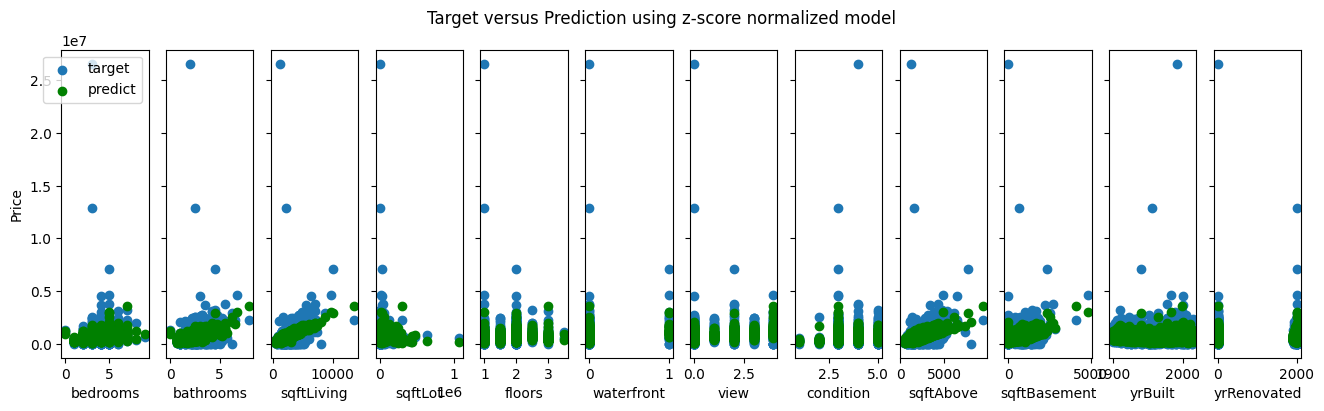

In [26]:
# Plot Results
fig, ax = plt.subplots(1, len(X_features), figsize=(16, 4), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:, i], y_train, label='target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:, i], y_pred, color='green', label='predict')
ax[0].set_ylabel("Price")
ax[0].legend()
fig.suptitle("Target versus Prediction using z-score normalized model")
plt.show()